<font color='blue'> **Doctor Name:** </font>**<br><br>
<font color='blue'> **City:** </font>**<br><br>
<font color='blue'> **Specialization:** </font>**<br><br>
<font color='blue'> **Doctor Qualification:** </font>**<br><br>
<font color='blue'> **Experience(Years):** </font>**<br><br>
<font color='blue'> **Total_Reviews:** </font>**<br><br>
<font color='blue'> **Patient Satisfaction Rate(%age):** </font>**<br><br>
<font color='blue'> **Avg Time to Patients(mins):** </font>**<br><br>
<font color='blue'> **Wait Time(mins):** </font>**<br><br>
<font color='blue'> **Hospital Address:** </font>**<br><br>
<font color='blue'> **Doctors Link:** </font>**<br><br>
<font color='blue'> **Fee(PKR):** </font>**<br><br>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   

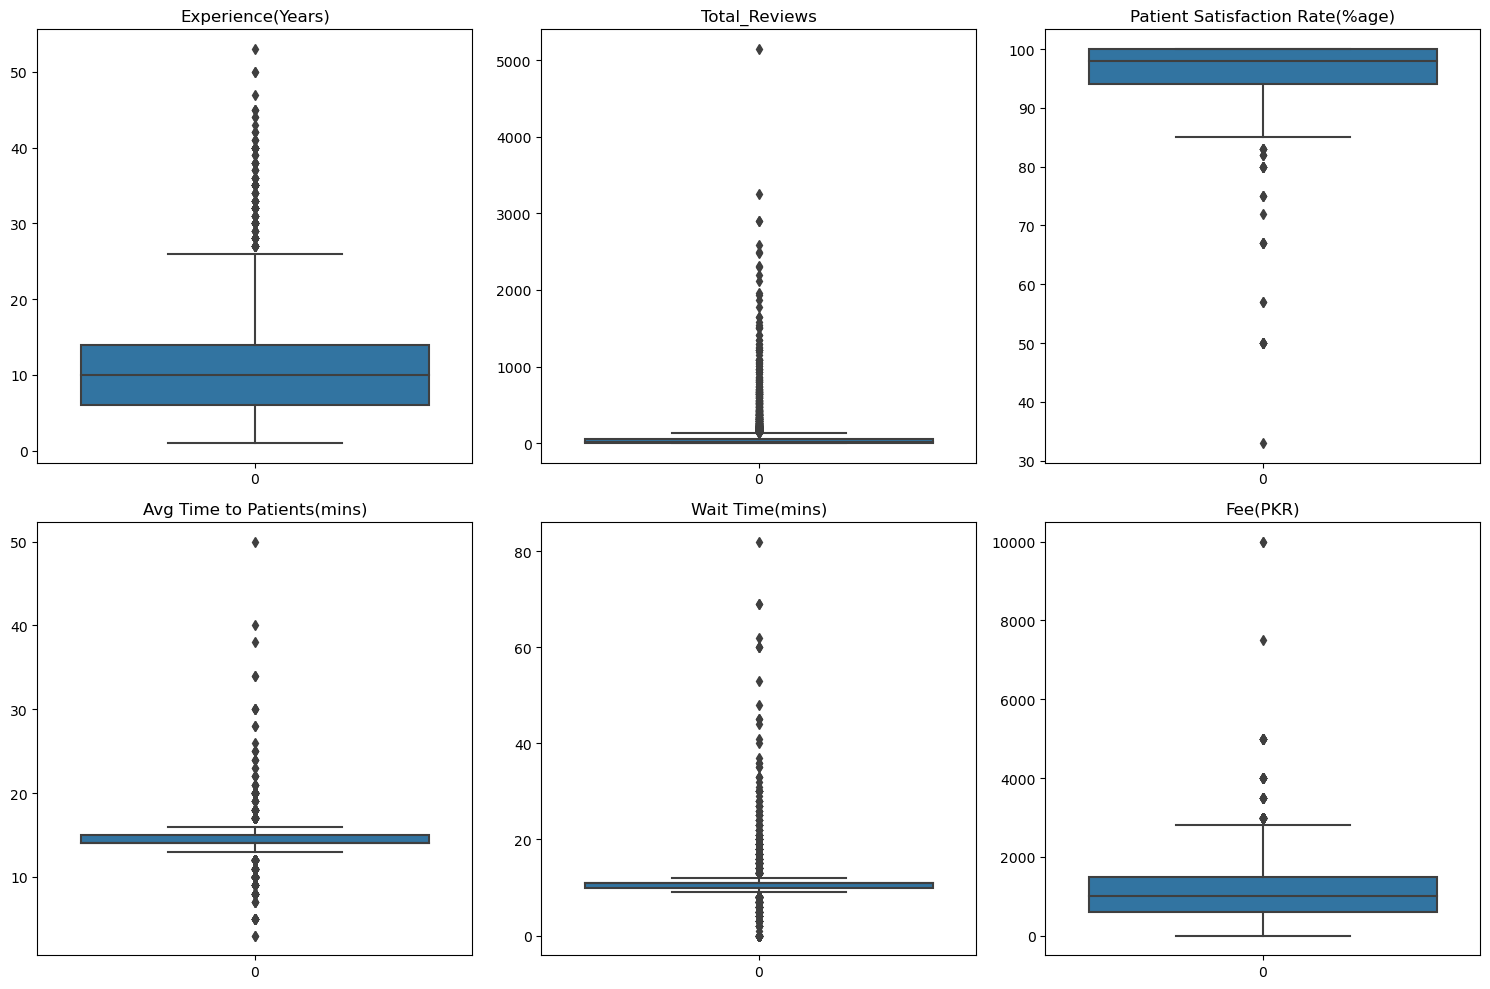

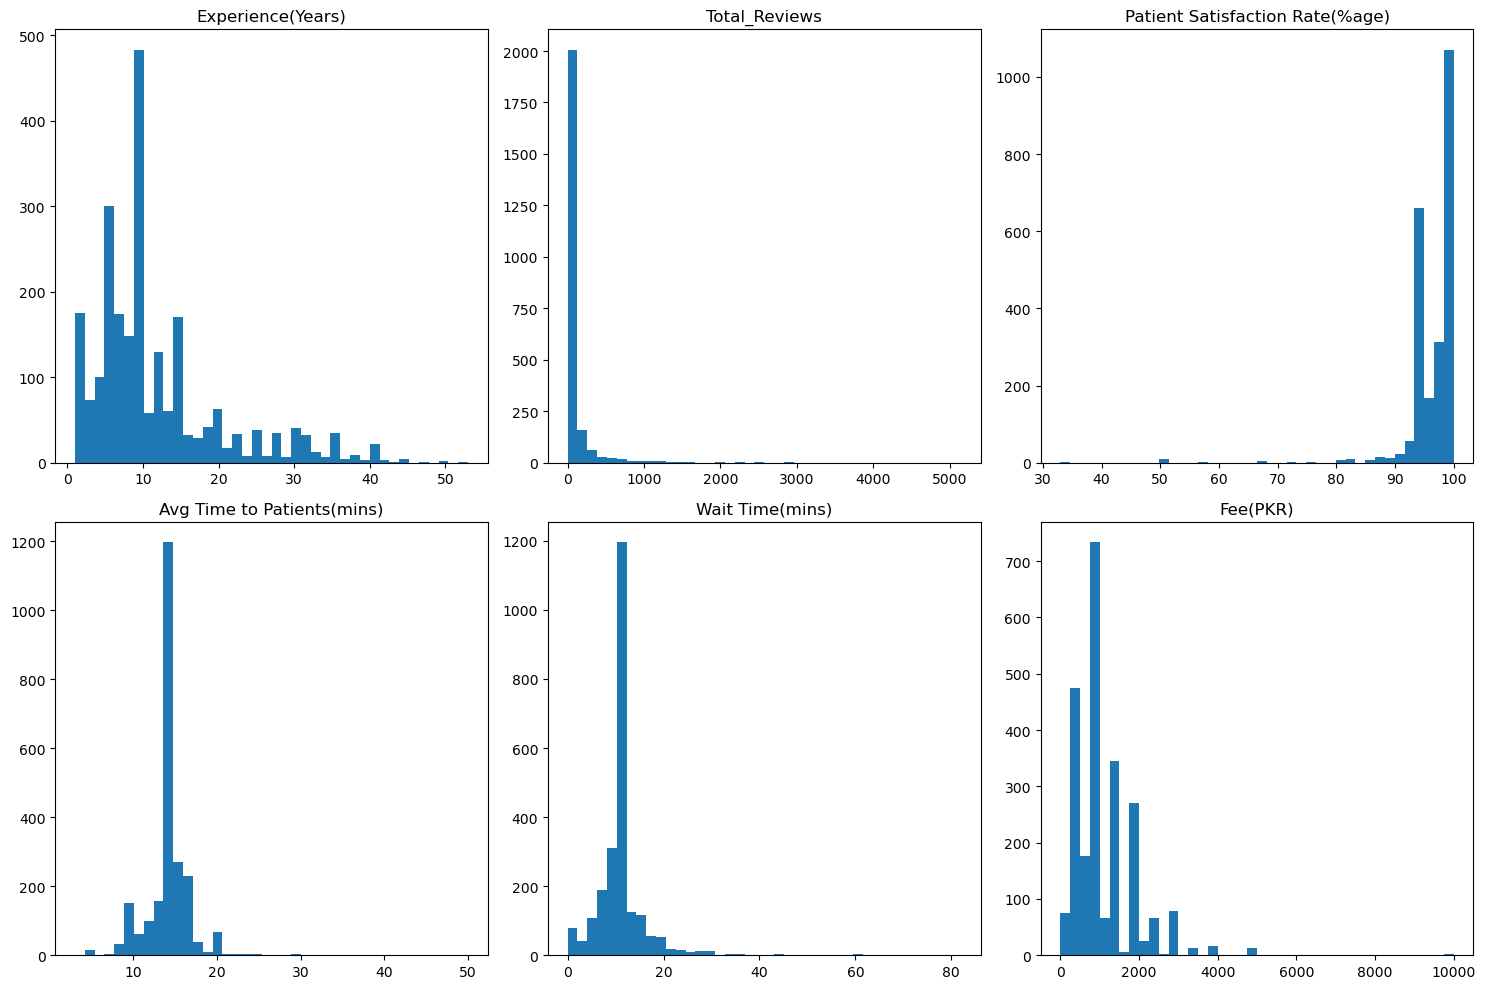

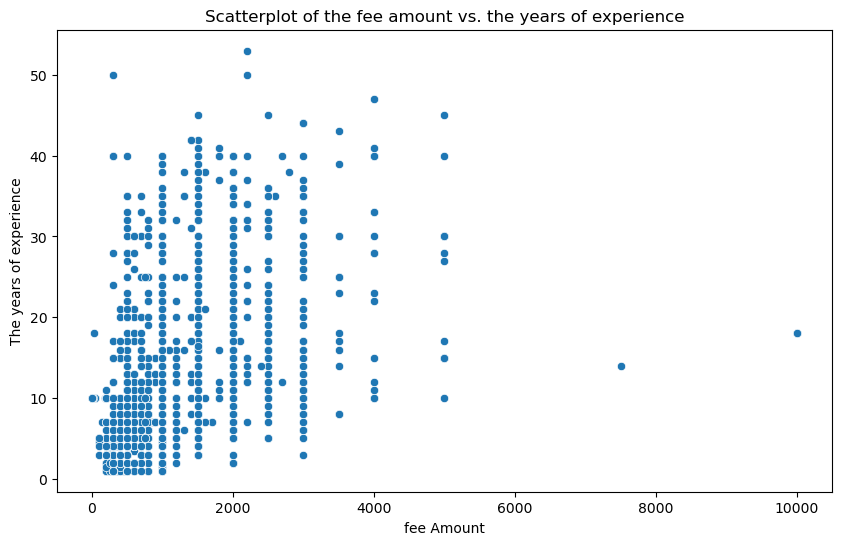

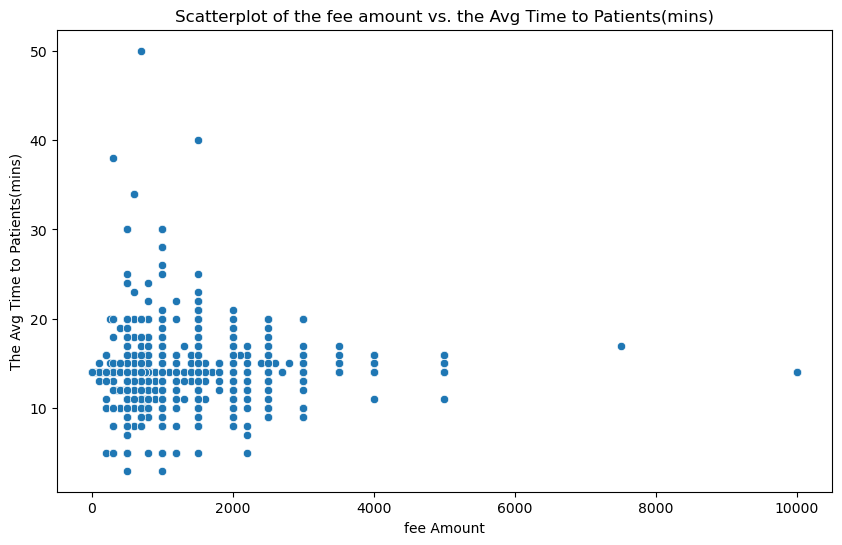

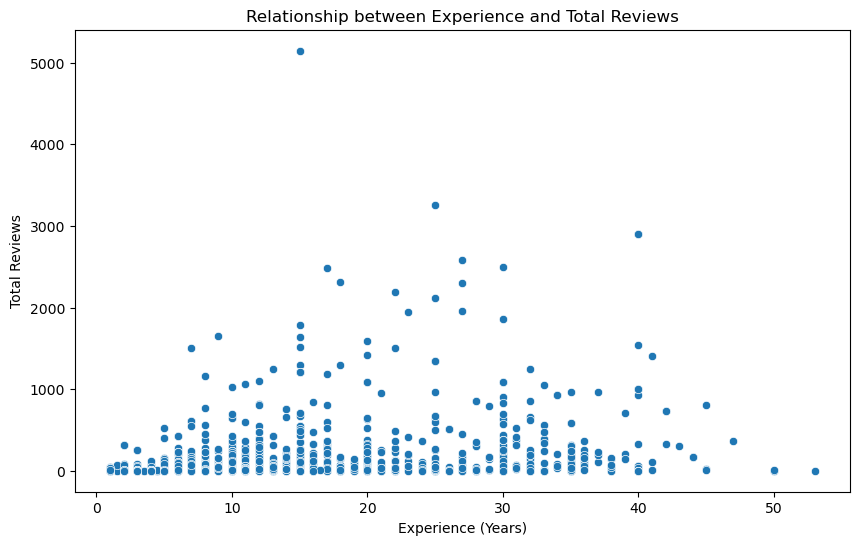

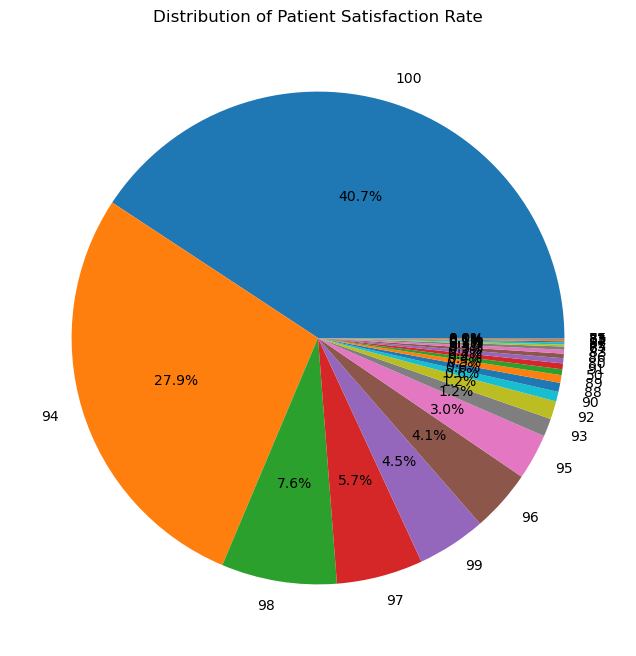

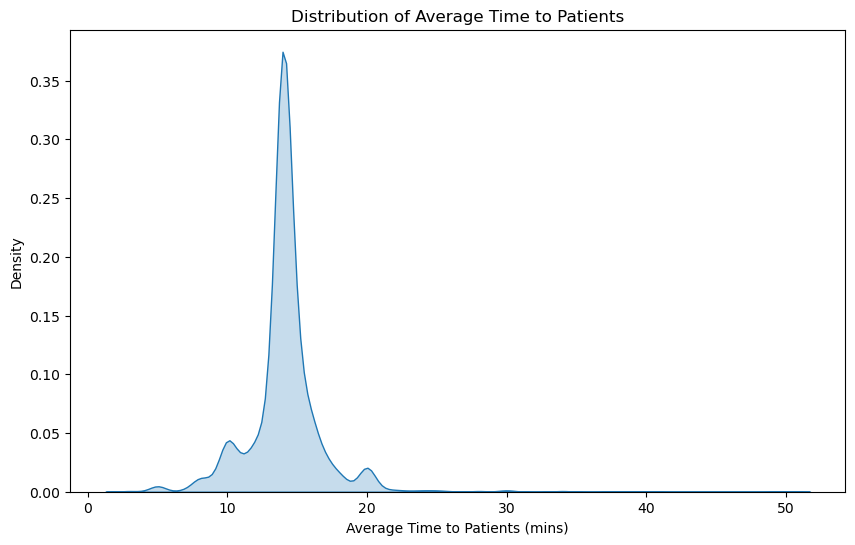

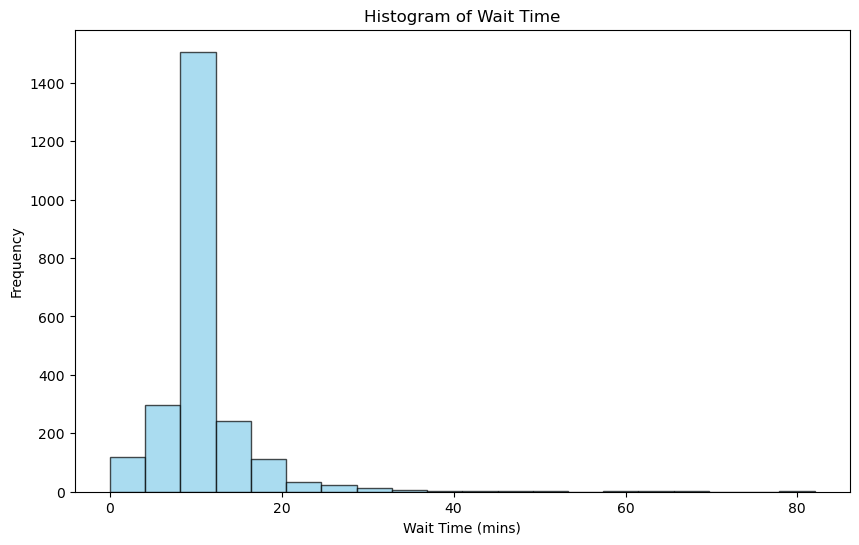

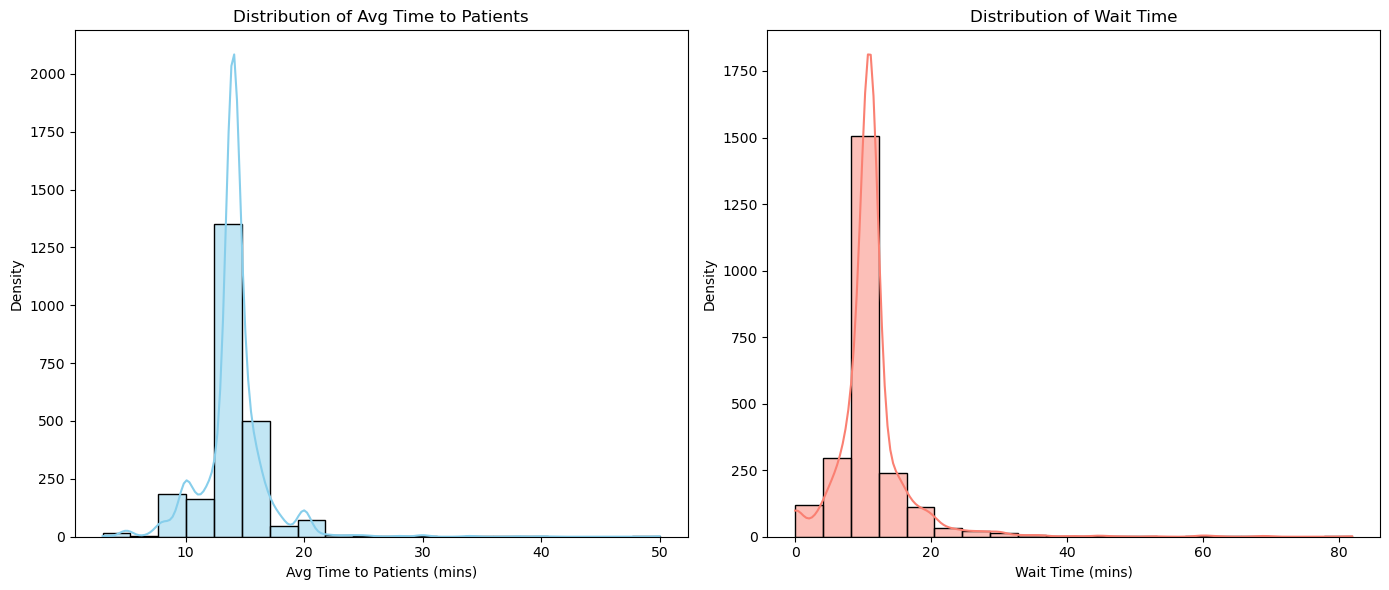

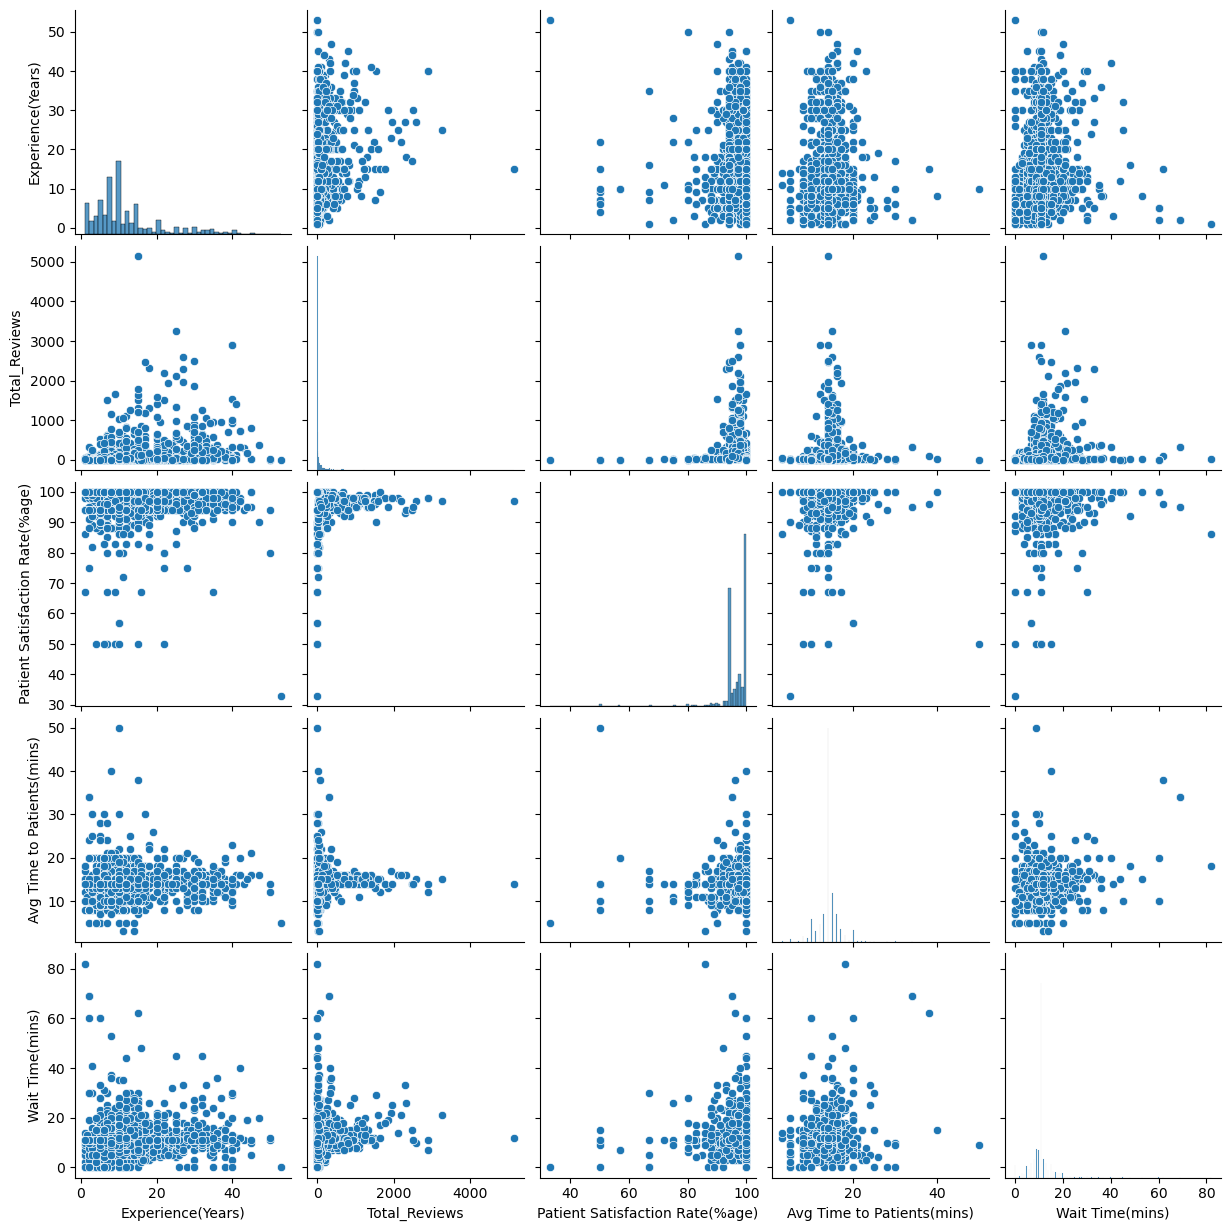

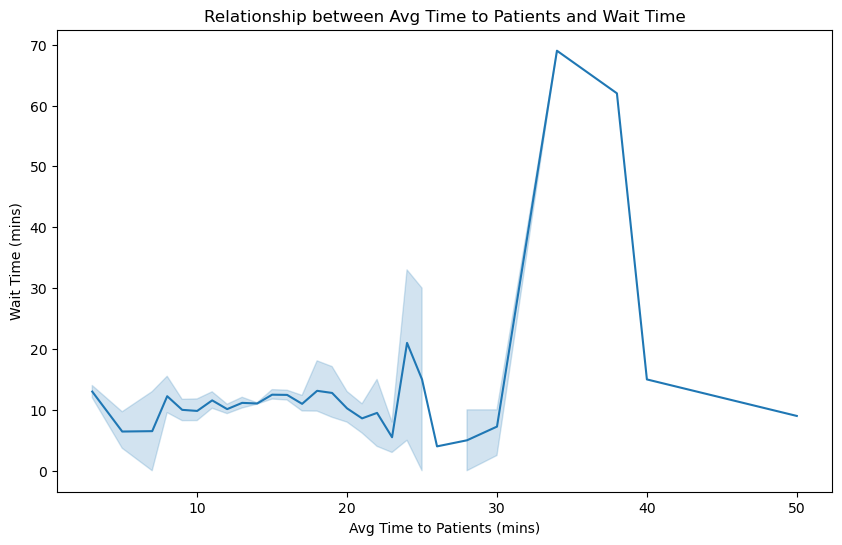

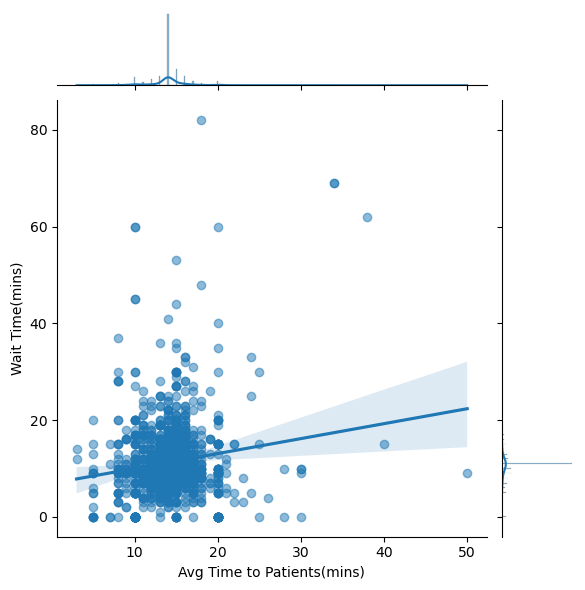

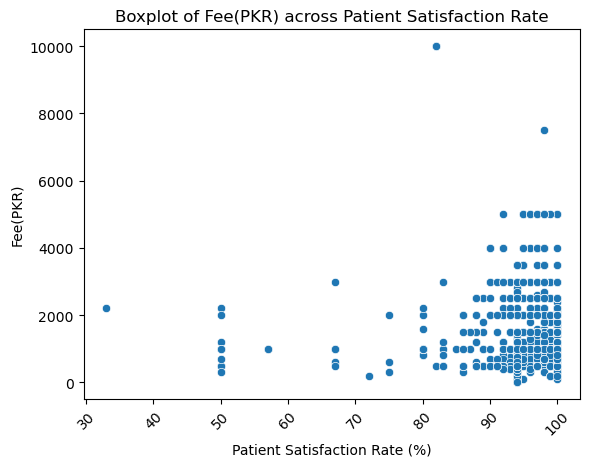

[('MBBS', 2209), ('FCPS', 1342), ('MCPS', 304), ('MS', 110), ('MD', 78), ('FRCS', 75), ('DCH', 28), ('', 26), ('DTCD', 24), ('MRCS', 22), ('RMP', 20), ('MRCP', 20), ('FACS', 19), ('FACP', 14), ('MPH', 13), ('DOMS', 11), ('MRCOG', 9), ('MRCP (UK)', 9), ('PGPN', 8), ('DLO', 8), ('Diploma In Dermatology', 7), ('MRCP (Ireland)', 7), ('FICS', 6), ('DHMS', 6), ('MRCP (Medicine)', 6), ('MBBS (Gold Medalist)', 6), ('Diploma in Child Health (DCH)', 5), ('PGPN (USA)', 5), ('MBBS-FCPS', 5), ('UK)', 5), ('MRCOG (UK)', 5), ('MD(USA)', 5), ('SCE (UK)', 5), ('MRCPCH', 5), ('Diploma in Dermatology', 5), ('MD (Medicine)', 5), ('FICS (USA)', 5), ('M.S', 4), ('Diploma in Child Health', 4), ('MD Nephrology', 4), ('DGO', 4), ('MD (USA)', 4), ('FACG (US)', 4), ('ESEGH ( European Board Of Gastroenterology &amp; Hepatology)', 4), ('FCCP (USA)', 4), ('MRCS (Glasgow)', 4), ('Diploma (Dermatology)', 4), ('FRCP', 4), ('MBBS (Pb)', 4), ('professor', 3), ('Certified Dermatologist', 3), ('DIP (Sexology)', 3), ('MD (

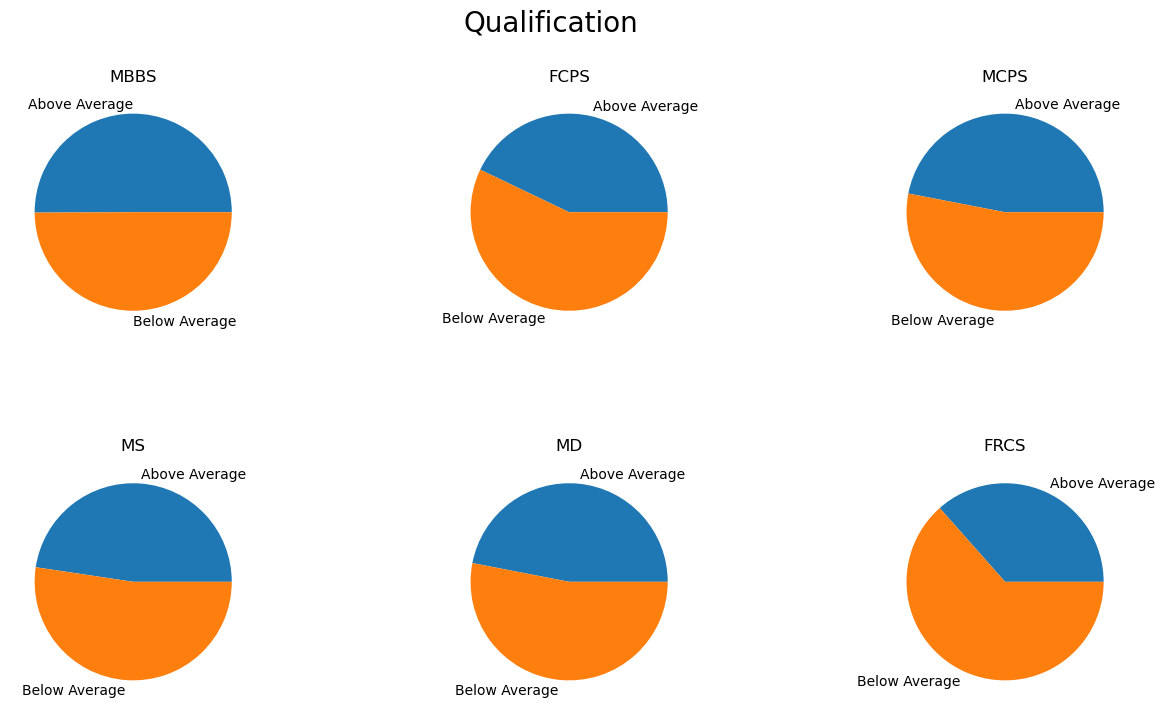

City
LAHORE            151
KARACHI           151
ISLAMABAD         147
PESHAWAR          134
MULTAN            126
QUETTA            118
FAISALABAD        112
HYDERABAD          94
GUJRANWALA         91
BAHAWALPUR         77
RAHIM-YAR-KHAN     77
ABBOTTABAD         60
SIALKOT            58
SARGODHA           55
GUJRAT             35
OKARA              34
SAHIWAL            31
SWABI              31
MARDAN             30
SWAT               30
KASUR              28
SADIQABAD          26
WAH-CANTT          26
JHELUM             25
SHEIKHUPURA        21
NOWSHERA           21
LARKANA            21
Name: count, dtype: int64
percentage of Doctors being paid above average in GUJRANWALA: 0.41%
0.4065934065934066
percentage of Doctors being paid above average in HYDERABAD: 0.18%
0.18085106382978725
percentage of Doctors being paid above average in LAHORE: 0.78%
0.7814569536423841
percentage of Doctors being paid above average in ISLAMABAD: 0.76%
0.7551020408163265
percentage of Doctors being paid

In [4]:
#!/usr/bin/env python
# coding: utf-8

# # OBJECTIVE

# The aim of this dataset called Doctor Fee Prediction based on the qualifications mentioned in the data dataset. 
# This dataset is valuable for analyzing and understanding various factors influencing doctores fee , 
# enabling researchers and analysts to develop models thataccurately predict fee  based on relevant input features.

# In[166]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy.sparse
from sklearn.model_selection import train_test_split

from sklearn.svm import  SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')


# In[167]:


df = pd.read_csv("DoctorFeePrediction.csv")


# In[168]:


df.head()


# In[169]:


df.tail()


# In[170]:


for i in df.columns:
    print("<font color='blue'> **"+i+":**","</font>**<br><br>")


# > <font color='blue'> **Doctor Name:** </font> *Doctors name*<br><br>
# <font color='blue'> **City:** </font> *doctors city*<br><br>
# <font color='blue'> **Specialization:** </font> *doctors specialization*<br><br>
# <font color='blue'> **Doctor Qualification:** </font> *Doctors Qualifications*<br><br>
# <font color='blue'> **Experience(Years):** </font> *explain the years of experience*<br><br>
# <font color='blue'> **Total_Reviews:** </font> *Shows the total reviews of the doctor*<br><br>
# <font color='blue'> **Patient Satisfaction Rate(%age):** </font> *the percentage of satisfaction of patient*<br><br>
# <font color='blue'> **Avg Time to Patients(mins):** </font> *shows the patient average time in his session*<br><br>
# <font color='blue'> **Wait Time(mins):** </font> *The time the patient waits to enter his reservation* <br><br>
# <font color='blue'> **Hospital Address:** </font> *The addrsss of the hospital*<br><br>
# <font color='blue'> **Doctors Link:** </font> *shows doctors link (his site)*<br><br>
# <font color='blue'> **Fee(PKR):** </font> *shows the doctors fee*<br><br>

# In[171]:


df.info()


# In[172]:


df.describe()


# In[ ]:





# In[173]:


df.shape


# In[174]:


df.dtypes


# In[175]:


###number of unique values in each column
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

for column in num:
    unique_categories_count = df[column].nunique()
    print(f'Unique categories in {column}: {unique_categories_count}')
    print (df[column].head(10).unique(), '... etc' )

print('-'*80)

for column in cat:
    unique_categories_count = df[column].nunique()
    print(f'Unique categories in {column}: {unique_categories_count}')


# # Cleaning the data

# In[176]:


print("Fee min value",df["Fee(PKR)"].min())
print("Fee max value",df["Fee(PKR)"].max())


# In[177]:


# not possible to make the fee value is zero
df = df[df['Fee(PKR)'] > 0]
print("After filtering:", df.shape)


# In[178]:


print(df.isnull().sum())
print(df.duplicated().sum())


# In[179]:


df.reset_index(inplace=True) # fixing the indices mismatch


# In[180]:


df.head()


# In[181]:


# Costing Features
df=df.drop(['Doctor Name'],axis=1)
df=df.drop(['index'],axis=1)


# In[182]:


df.head()


# # Univariate Analysis

# In[183]:


#Numerical columns for which I want to create boxplots for
num_cols = ['Experience(Years)','Total_Reviews','Patient Satisfaction Rate(%age)',
            'Avg Time to Patients(mins)','Wait Time(mins)','Fee(PKR)']

#Calculate number of rows needed for subplots
n = len(num_cols)
n_rows = n // 3
n_rows += n % 3

#Create subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

#Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    fig.delaxes(ax)

#Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


# In[184]:


# Numerical columns for which I want to create boxplots for
num_cols = ['Experience(Years)','Total_Reviews','Patient Satisfaction Rate(%age)',
            'Avg Time to Patients(mins)','Wait Time(mins)','Fee(PKR)']

# Calculate number of rows needed for subplots
n = len(num_cols)
n_rows = n // 3
n_rows += n % 3

# Create subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    fig.delaxes(ax)

# Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    axs[i].hist(df[col], bins=40)  # Adjust the number of bins as needed
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


# ##### Most of the data is skedwed

# ## Bivariate Analysis

# In[185]:


df.columns


# In[186]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Fee(PKR)", y="Experience(Years)")
plt.title("Scatterplot of the fee amount vs. the years of experience")
plt.xlabel("fee Amount")
plt.ylabel("The years of experience")
plt.show()


# In[187]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Fee(PKR)", y="Avg Time to Patients(mins)")
plt.title("Scatterplot of the fee amount vs. the Avg Time to Patients(mins)")
plt.xlabel("fee Amount")
plt.ylabel("The Avg Time to Patients(mins)")
plt.show()


# In[188]:


# Scatter plot: Experience vs Total_Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Experience(Years)', y='Total_Reviews')
plt.title('Relationship between Experience and Total Reviews')
plt.xlabel('Experience (Years)')
plt.ylabel('Total Reviews')
plt.show()


# In[189]:


# Pie chart: Distribution of Patient Satisfaction Rate
plt.figure(figsize=(8, 8))
df['Patient Satisfaction Rate(%age)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Patient Satisfaction Rate')
plt.ylabel('')
plt.show()


# In[190]:


# Distribution plot (KDE plot): Avg Time to Patients
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Avg Time to Patients(mins)', fill=True)
plt.title('Distribution of Average Time to Patients')
plt.xlabel('Average Time to Patients (mins)')
plt.ylabel('Density')
plt.show()


# In[191]:


# Histogram: Wait Time
plt.figure(figsize=(10, 6))
plt.hist(df['Wait Time(mins)'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Wait Time')
plt.xlabel('Wait Time (mins)')
plt.ylabel('Frequency')
plt.show()


# In[192]:


# Subplot: Distribution of Avg Time to Patients and Wait Time
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Avg Time to Patients(mins)'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Avg Time to Patients')
plt.xlabel('Avg Time to Patients (mins)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(df['Wait Time(mins)'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Wait Time')
plt.xlabel('Wait Time (mins)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# In[193]:


# Pairplot: Visualize pairwise relationships and distributions
sns.pairplot(df[['Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)', 
                 'Avg Time to Patients(mins)', 'Wait Time(mins)']])
plt.show()


# In[194]:


# Line plot: Relationship between Avg Time to Patients and Wait Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Avg Time to Patients(mins)', y='Wait Time(mins)')
plt.title('Relationship between Avg Time to Patients and Wait Time')
plt.xlabel('Avg Time to Patients (mins)')
plt.ylabel('Wait Time (mins)')
plt.show()


# In[195]:


# Jointplot: Explore the relationship between Avg Time to Patients and Wait Time
sns.jointplot(data=df, x='Avg Time to Patients(mins)', y='Wait Time(mins)', kind='reg', scatter_kws={'alpha':0.5})
plt.show()


# In[196]:


# Boxplot: Examine the distribution of Fee(PKR) across different levels of Patient Satisfaction Rate
sns.scatterplot(data=df, x='Patient Satisfaction Rate(%age)', y='Fee(PKR)')
plt.title('Boxplot of Fee(PKR) across Patient Satisfaction Rate')
plt.xlabel('Patient Satisfaction Rate (%)')
plt.ylabel('Fee(PKR)')
plt.xticks(rotation=45)
plt.show()


# In[197]:


first_split = df['Hospital Address'].str.split(',', expand=True)
second_split = first_split[0].str.split(';', expand=True)
new_column_zero = second_split.iloc[:, 0]
df_concatenated = pd.concat([df, new_column_zero], axis=1)
df = df_concatenated.rename(columns={0: 'Hospital Name'})
df.drop('Hospital Address', axis=1, inplace=True)


# In[198]:


df.head()


# In[199]:


df.shape


# In[200]:


def encode_link(link):
    if link != 'No Link Available':
        return 1
    else:
        return 0

# Apply the function to encode the 'Doctors Link' column
df['Doctors Link'] = df['Doctors Link'].apply(lambda x: encode_link(x))

# Now 'Doctors Link' column contains 1 if a link is available, 0 otherwise


# In[201]:


df.head()


# In[202]:


qualifications = {'FCPS': 0, 'FRCS':0, 'M.S':0, 'MCPS' : 0, 'professor':0, 'DTCD':0, 'MS':0, 'FACP':0, 'FACS':0}
for i in range(df.shape[0]):
    qualifications_ = df.iloc[i]['Doctor Qualification']
    qualifications_of_one_doc =  qualifications_.split(',')
    for qualification in qualifications_of_one_doc:
        if qualification.strip(' ').startswith('FCPS'):
            qualifications['FCPS']+=1
        elif qualification.strip(' ').startswith('FRCS'):
            qualifications['FRCS']+=1
        elif qualification.strip(' ').startswith('M.S'):
            qualifications['M.S']+=1
        elif qualification.strip(' ').startswith('DTCD'):
            qualifications['DTCD']+=1
        elif qualification.strip(' ').startswith('MCPS'):
            qualifications['MCPS']+=1
        elif qualification.strip(' ').startswith('MS') or qualification.strip(' ').startswith('M.S'):
            qualifications['MS']+=1
        elif qualification.strip(' ').startswith('FACP'):
            qualifications['FACP']+=1
        elif qualification.strip(' ').startswith('FACS'):
            qualifications['FACS']+=1
        elif qualification.lower().find('professor') != -1: 
            qualifications['professor']+=1
        elif qualifications.get(qualification.strip(' ')) == None:
            qualifications[qualification.strip(' ')] = 1
        else:
            qualifications[qualification.strip(' ')]+=1
qualifications


# # _____________________________________________________________________________________________________________________
# MBBS : Bachelor of Medicine, Bachelor of Surgery
# 
# FCPS : Fellow of College of Physicians and Surgeons 
# 
# MCPS : Membership of the College of Physicians and Surgeons
# 
# MS   : Master of Surgery
# 
# MD   : Doctor of Medicine 
# 
# FRCS : Fellowship of the Royal Colleges of Surgeons

# difference between FCPS & MCPS
# 
# https://study-fcps.com/fcps-and-mcps-the-key-differences-between-the-two-fellowship-programs-of-cpsp/#:~:text=MCPS%20qualified%20doctors%20can%20work,is%20completed%20in%202%20years.
# 
# 
# according to this source, doctors with FCPS are paid more than doctors with MCPS.
# this'll be verified later
# # ___________________________________________________________________________________________-

# In[203]:


sorted_freq = sorted(qualifications.items(), key=lambda item: item[1], reverse=True)
print(sorted_freq) 


# In[204]:


popular_degrees = ['MBBS', 'FCPS', 'MCPS', 'MS', 'MD', 'FRCS']

condition = df['Doctor Qualification'].str.contains('|'.join(popular_degrees))
df = df[condition]


# In[205]:


df.shape


# In[206]:


temp_df = df[['Doctor Qualification']]
temp_df.head(5)


# In[207]:


qualifications_df = pd.DataFrame({'MBBS':[], 'FCPS':[], 'MCPS':[], 'MS':  [], 'MD':  [], 'FRCS':[]})
qualifications_df.head()


# In[208]:


for  index in range(temp_df.shape[0]):
    current_qualifications = temp_df.iloc[index]['Doctor Qualification']
    row = []
    for qualification in popular_degrees:
        if current_qualifications.find(qualification) != -1:
            row.append(1)
        else:
            row.append(0)
    qualifications_df.loc[len(qualifications_df)] = row 
    
qualifications_df.head()


# In[209]:


print(df.shape)
print(qualifications_df.shape)


# In[210]:


# Check indices of both DataFrames
print("Indices of df1:", df.index)
print("Indices of df2:", qualifications_df.index)
df.reset_index(inplace=True) # fixing the indices mismatch


# In[211]:


df[popular_degrees] = qualifications_df[popular_degrees].copy()

df.drop(['Doctor Qualification', 'index'], axis=1, inplace=True)

df.rename(columns={'Experience(Years)':'EXP(YRs)',
                   'Total_Reviews' : '#Reviews',
                   f'Patient Satisfaction Rate(%age)': 'Satisfaction Rate'}, inplace=True)



# In[212]:


temp_df = df.copy()
threshold =  temp_df['Fee(PKR)'].mean()
fee_binary = temp_df['Fee(PKR)'] > threshold
fee_binary = fee_binary.astype(int)


# In[213]:


print(fee_binary.sum())
print(fee_binary.shape)


# In[214]:


comparison_df = df[popular_degrees].copy()
comparison_df.head()


# ## verifying that Doctors with MCPS are paid less than Doctors with FCPS

# In[215]:


print(len(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]))
print("_______________________________\n")
print(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]['Fee(PKR)'].min())
print(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]['Fee(PKR)'].max())


# In[216]:


print(len(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]))
print("_______________________________\n")
print(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]['Fee(PKR)'].min())
print(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]['Fee(PKR)'].max())


# In[217]:


comparison_df['Fee'] = fee_binary
comparison_df.head()


# In[218]:


col1 = ['MBBS', 'FCPS', 'MCPS', 'MS', 'MD', 'FRCS']
lab = ['Above Average', 'Below Average']

fig, axes = plt.subplots(figsize=(15, 8))
fig.suptitle('Qualification', fontsize=20)
k = 1

for col in col1:
    arr = []
    for i in range(2):
        x = df[df[col] == i]
        arr.append(np.mean(x['Fee(PKR)']))
    plt.subplot(2, 3, k)
    k += 1
    plt.title(col)
    plt.pie(arr, labels=lab)

# Adjusting space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


# ### **Insights**
# * Most Doctors are paid less than the average Fee
# * Qualifications and Degrees don't seem to have any effect on the Fee

# In[54]:


df.head()


# In[55]:


len(df['City'].value_counts())


# In[56]:


cities = df['City'].value_counts()[0:27]
print(cities)


# In[57]:


def percentage_according_to_city(city_name):
    df_karachi_c = df['City'] == city_name
    df_karachi = df[df_karachi_c][['Fee(PKR)']]
    df_karachi_binary =  df_karachi['Fee(PKR)'] > threshold
    percentage = df_karachi_binary.sum()/df_karachi_binary.count()
    print(f'percentage of Doctors being paid above average in {city_name}: {round(percentage, 2)}%')
    return percentage


# In[58]:


(df['City'] == 'KARACHI').sum()


# In[59]:


lst = []
for val in df['City'].unique():
    if (df['City'] == val).sum() > 30:
        v = percentage_according_to_city(val)
        print(v)
        lst.append([val, round(v, 2), (df['City'] == val).sum()])


# In[60]:


sorted_ratios = sorted(lst, key=lambda item: item[1], reverse=True)


# In[61]:


sorted_ratios


# In[62]:


print('Count\t\tRatio Count')


column_widths = [max(map(len, map(str, col))) for col in zip(*sorted_ratios)]

for row in sorted_ratios:
    for i, elem in enumerate(row):
        print(str(elem).ljust(column_widths[i] + 2), end='')
    print()


# ## Insights
# all cities with rate higher than 50% are listed on Wikipedia's Top 10 (Cities by GDP) list
# 
# <img src="wiki.png" width = 75% alt="title">
# 
# 
# https://en.wikipedia.org/wiki/List_of_Pakistani_administrative_units_by_gross_state_product

# ## Hence cities will be ordinally encoded

# In[63]:


print(type(df['FCPS'].values))
print(sys.getsizeof(df['FCPS'].values))


# In[64]:


for column_name in popular_degrees:
    sparse_series = pd.Series(pd.arrays.SparseArray(df[column_name].values))
    df[column_name] = sparse_series


# In[65]:


print(type(df['FRCS'].values))
print(sys.getsizeof(df['FRCS'].values))


# In[66]:


df.head()


# In[67]:


specializations = []
for cell in df['Specialization']:
    specs = cell.split(', ')
    for spec in specs:
        specializations.append(spec)

unique_specializations = set(specializations)


# In[68]:


print(len(specializations))
print(len(unique_specializations))


# In[69]:




# In[70]:


specs_cols = {spec : [] for spec in unique_specializations }
print(specs_cols)


# In[71]:


specs_df = pd.DataFrame(specs_cols)
temp_df = df[['Specialization']]
temp_df.shape


# In[72]:


for  index in range(temp_df.shape[0]):
    current_spec = temp_df.iloc[index]['Specialization']
    row = []
    for specialization in unique_specializations:
        if current_spec.find(specialization) != -1:
            row.append(1)
        else:
            row.append(0)
    specs_df.loc[len(specs_df)] = row 
    
specs_df.head()


# In[73]:


specs_df['Ent Specialist'].head()


# In[74]:


specs_df['General Physician'].head()


# In[75]:


df[list(unique_specializations)] = specs_df[list(unique_specializations)]


# In[76]:




# In[77]:


for column_name in unique_specializations:
    sparse_series = pd.Series(pd.arrays.SparseArray(df[column_name].values))
    df[column_name] = sparse_series


# In[78]:


df.shape


# In[79]:


df.head()


# In[80]:


# df.drop(['Specialization'], axis=1, inplace=True)


# In[81]:


mean_encoder = ce.TargetEncoder()
mean_encoder.fit(df[['City']], df['Fee(PKR)'])
df['City'] = mean_encoder.transform(df['City'])
mean_encoder.fit(df[['Specialization']], df['Fee(PKR)'])
df['Specialization'] = mean_encoder.transform(df['Specialization'])


# In[82]:


df.head()


# In[83]:


indices = []
for i in range(df.shape[0]):
    if df['Hospital Name'].iloc[i] == 'No Address Available':
        indices.append(i)

mean_encoder.fit(df[['Hospital Name']], df['Fee(PKR)'])
df['Hospital Name'] = mean_encoder.transform(df['Hospital Name'])


# In[84]:


df.head()


# In[85]:


for index in indices:
    df['Hospital Name'].iloc[index] = 0


# In[86]:


# df['Hospital Name'].replace(0, np.nan, inplace=True)


# In[87]:


df.head()


# In[88]:


included_features = ['City', 'EXP(YRs)', '#Reviews', 'Satisfaction Rate', 'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Doctors Link', 'Hospital Name', 'Specialization']
features = df[included_features]
target = df["Fee(PKR)"]

k_best = SelectKBest(score_func=f_regression, k=6)

X = k_best.fit_transform(features, target)
y = target

#Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")



# In[89]:


selected_features_df = features[['City', 'Specialization', 'EXP(YRs)', 'Hospital Name', '#Reviews', 'Doctors Link']]
selected_features_df['Fee(PKR)'] = df['Fee(PKR)']


# In[90]:


selected_features_df.describe()


# In[91]:


selected_features_df.shape


# In[92]:


selected_features_df.head()
# selected_features_df[list(unique_specializations)] = specs_df[list(unique_specializations)]
selected_features_df[popular_degrees] = comparison_df[popular_degrees]


# In[93]:


Q1 = 750
Q2 = 1000
Q3 = 1500

IQR = Q3 - Q1

range1 = Q3 + 1.5*IQR
range2 = Q1 - 1.5*IQR


condition = (selected_features_df['Fee(PKR)'] < range1) & (selected_features_df['Fee(PKR)'] > range2)  


# In[94]:


data_with_outliers = selected_features_df.copy()
selected_features_df = selected_features_df[condition]


# In[95]:


print(selected_features_df.shape)
print(data_with_outliers.shape)


# In[96]:


X_ = selected_features_df.drop(['Fee(PKR)'], axis=1).values
y_ = selected_features_df['Fee(PKR)'].values
RS = RobustScaler()
X_ = RS.fit_transform(X_)


# In[97]:


print("final_shape: ",X_.shape)
print(y_.shape)


# In[98]:


X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=0.7, random_state=42)


# In[99]:


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# In[100]:


RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
preds = RFR.predict(X_test)
mse = mean_squared_error(y_test, preds)


# In[101]:


sqrt(mse)


# In[102]:


r2_score(y_test, preds)


# In[103]:


preds_train = RFR.predict(X_train)
mse_train = mean_squared_error(y_train, preds_train)
r2_train = r2_score(y_train, preds_train)
print(sqrt(mse_train))
print(r2_train)


# In[104]:


print(RFR.max_depth)


# In[105]:


RFR_params = {
    'n_estimators': [90, 100,110, 120],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf' : [2,3],
}

GSCV = GridSearchCV(RandomForestRegressor(), cv=4, param_grid=RFR_params, scoring='r2')
GSCV.fit(X_train, y_train)


# In[106]:


print(GSCV.best_params_)
print(GSCV.best_score_)


# In[107]:


def evaluate_model(model):
    test_preds = model.predict(X_test)
    train_preds = model.predict(X_train)

    test_rmse = sqrt(mean_squared_error(y_true=y_test, y_pred= test_preds))
    train_rmse = sqrt(mean_squared_error(y_true=y_train , y_pred= train_preds))
    test_r2 = r2_score(y_test, test_preds)
    train_r2 = r2_score(y_train, train_preds)
    
    print(f'train rmse: {train_rmse}')
    print(f'train r2 score: {train_r2}')
    print("__________________")
    print("------------------")
    print(f'test rmse: {test_rmse}')
    print(f'test r2 score: {test_r2}')


# In[108]:


svm = SVR(kernel='poly', degree=1, C=0.8)
svm.fit(X_train, y_train)
evaluate_model(svm)


# In[109]:


RFR1 = RandomForestRegressor( max_depth= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 50)
RFR1.fit(X_train, y_train)
evaluate_model(RFR1)


# In[130]:


RFR2 = RandomForestRegressor(max_depth=6, min_samples_split=3, min_samples_leaf=2, n_estimators=160, random_state = 102)
RFR2.fit(X_train, y_train)
evaluate_model(RFR2)


# In[156]:


XG = GradientBoostingRegressor(max_depth=3, min_samples_split=4, min_samples_leaf=1, n_estimators=100, random_state = 102)
XG.fit(X_train, y_train)
evaluate_model(XG)


# In[228]:


ETR = ExtraTreesRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1, 
                          n_estimators=65, random_state = 102, oob_score=True, bootstrap=True)

ETR.fit(X_train, y_train)
evaluate_model(ETR)


# In[229]:


vr = VotingRegressor(
    estimators=[('XG', XG), ('ETR', ETR), ('RFR', RFR2),],
)

vr.fit(X_train, y_train)

evaluate_model(vr)


# In[114]:


ADA = AdaBoostRegressor(base_estimator=XG , learning_rate=0.01, n_estimators=100, random_state=102)

ADA.fit(X_train, y_train)
evaluate_model(ADA)


# In[115]:

